In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv("/Users/casper/Desktop/Scriptie/csv files/events_count_cameo.csv", sep=';')
df = df.drop(['Column1'],axis=1)
df

,Event.Text,Count,CAMEO.Code,Quad Class Hoff,Event.Short,Unnamed: 6,Unnamed: 7
0,Consult,1440923,40,v+,Consult,NaN,NaN
1,Host a visit,1039726,43,m+,Host,NaN,NaN
2,Make a visit,1039704,42,m+,Visit,NaN,NaN
3,Make statement,995053,10,NaN,Make statement,NaN,NaN
4,Express intent to meet or negotiate,955420,36,v+,Intend meeting,NaN,NaN
...,...,...,...,...,...,...,...
264,Express intent to ease popular dissent,3,352,v+,Intent easing popular dissent,NaN,NaN
265,Threaten to impose state of emergency or marti...,3,1324,v-,Threaten imposing state of emergency,NaN,NaN
266,Conduct strike or boycott for leadership change,2,1431,m-,Strike,NaN,NaN
267,Conduct hunger strike for leadership change,1,1421,m-,Hunger Strike,NaN,NaN


In [3]:
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

In [31]:
def create_wordcloud(df):
    data = {wrd: cnt for wrd, cnt in zip(df['Event.Short'], df['Count'])}

    wc = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf',\
                   background_color="white",\
                   width=3000, height=2000,\
                   #min_font_size = 26,\
                   #max_font_size=80,\
                   max_words=500).generate_from_frequencies(data)
    #import matplotlib.pyplot as plt
    wc.recolor(color_func = black_color_func)
    plt.figure(figsize=[15, 10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    #plt.show()
    #wordcloud.to_file("img/first_review.png")
    plt.savefig('/Users/casper/Desktop/wordcloud.png',dpi=400)

93

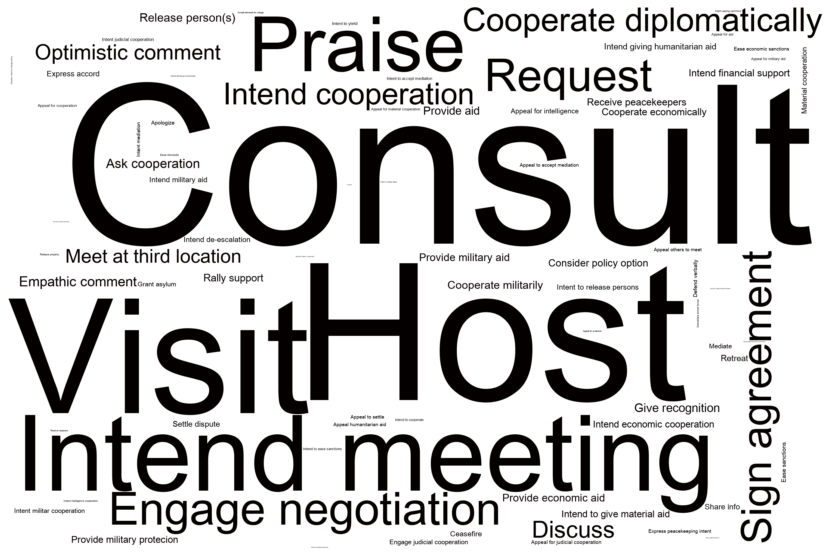

In [32]:
plus = df.loc[(df['Quad Class Hoff'] == "v+") | (df['Quad Class Hoff'] == "m+")]
plus
create_wordcloud(plus)
len(plus)

172

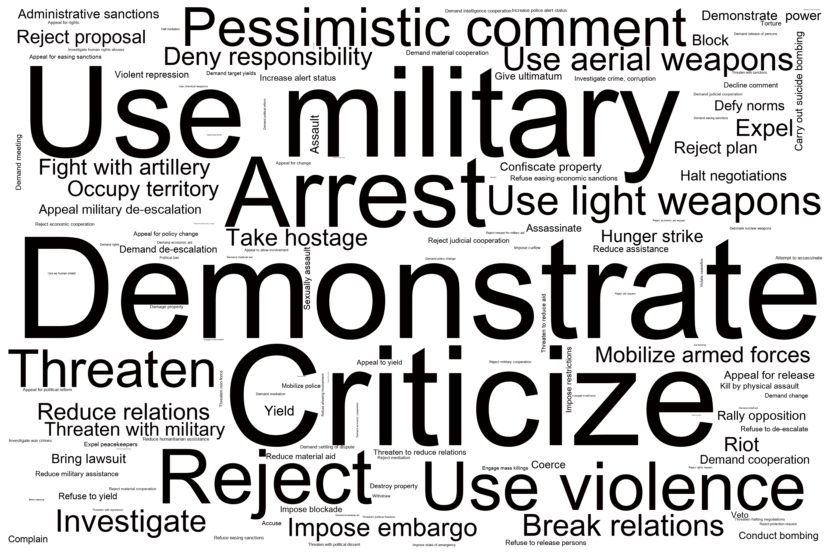

In [18]:
min = df.loc[(df['Quad Class Hoff'] == "v-") | (df['Quad Class Hoff'] == "m-")]
min
create_wordcloud(min)
len(min)

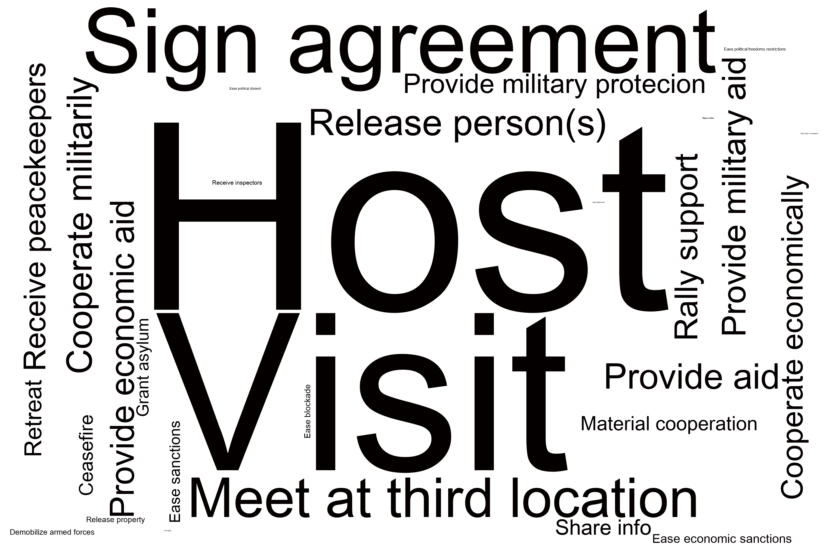

31

In [7]:
m_plus = df.loc[df['Quad Class Hoff'] == "m+"]
m_plus
create_wordcloud(m_plus)
len(m_plus)

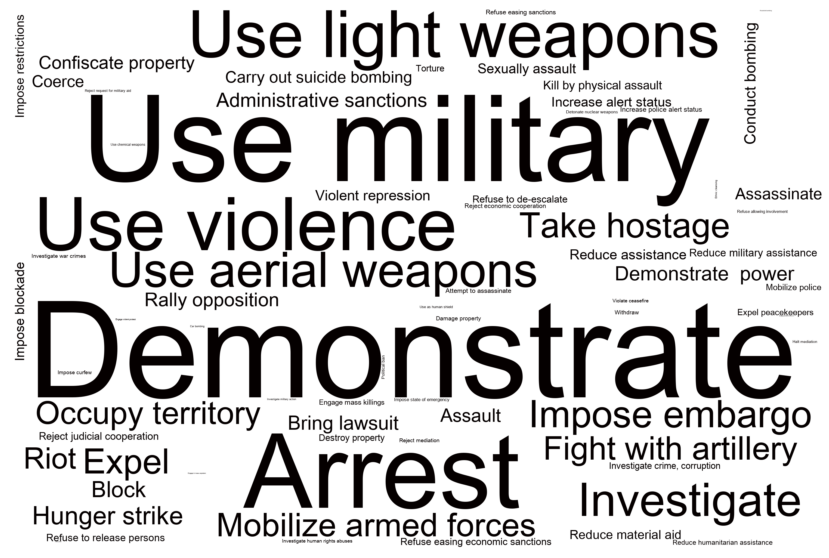

84

In [8]:
m_minus = df.loc[df['Quad Class Hoff'] == "m-"]
m_minus
create_wordcloud(m_minus)
len(m_minus)

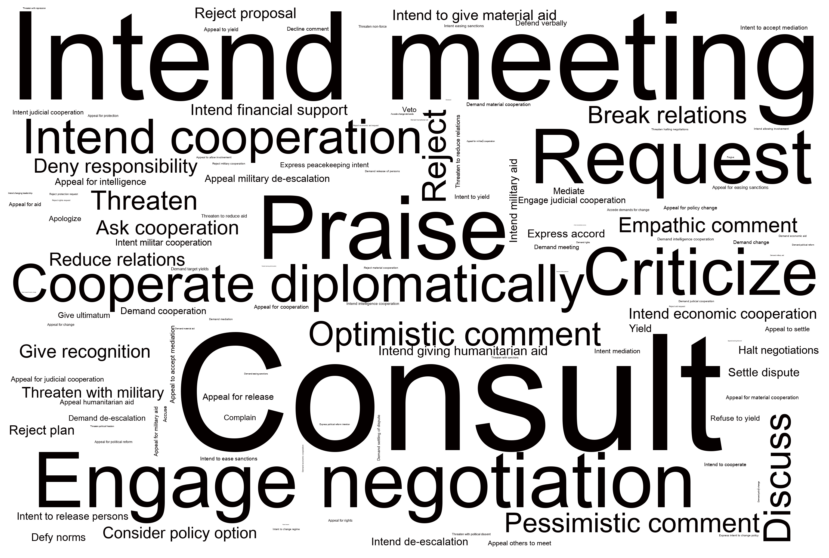

In [15]:
v = pd.concat([v_plus, v_minus], ignore_index=True)
v
create_wordcloud(v)

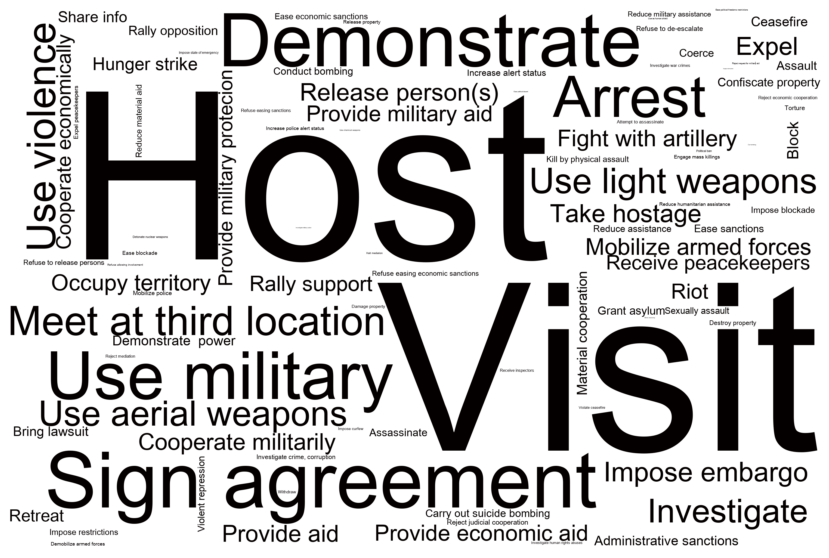

In [16]:
m = pd.concat([m_plus, m_minus], ignore_index=True)
create_wordcloud(m)